
# Annuity Mortgage Payment Profile Explanation

This notebook explains the code for an annuity mortgage payment profile. It includes the theory behind annuities, detailed explanations of each code block, and all relevant formulas in LaTeX.

---

## 1. Imports

```python
import numpy as np
import matplotlib.pyplot as plt
```

- **NumPy:** Used for numerical computing and creating/manipulating matrices.
- **Matplotlib:** Used for plotting graphs to visualize the mortgage payment schedule.

---

## 2. The Annuity Function

```python
def Annuity(rate, notional, periods, CPR):
```

- **Purpose:** Computes the annuity mortgage payment schedule.
- **Parameters:**
  - **`rate` ($r$):** The periodic interest rate.
  - **`notional` ($N_0$):** The initial loan amount.
  - **`periods` ($T$):** Total number of periods (e.g., years).
  - **`CPR` ($\Lambda$):** Conditional Prepayment Rate, representing the fraction of the remaining notional repaid early.

### Annuity Theory

An annuity consists of equal payments made at regular intervals. The fixed installment that fully amortizes the loan is given by the annuity formula:

$$
C = \frac{r \cdot N}{1 - \frac{1}{(1+r)^{T}}}
$$

where:
- $r$ is the interest rate per period,
- $N$ is the outstanding principal,
- $T$ is the number of remaining periods.

This formula ensures that the loan is completely repaid over the term, including the accrued interest.

---

## 3. Matrix Creation & Time Setup

```python
M = np.zeros((periods + 1, 6))
M[:,0] = np.arange(periods + 1)  # Set time indices
M[0,1] = notional                # Set the initial notional
```

- **Matrix Initialization:**  
  Creates a matrix $M$ of size $(T+1) \times 6$, where the columns represent:
  1. Time index $t$
  2. Outstanding notional $N(t)$
  3. Prepayment $P(t)$
  4. Principal (notional) repayment $Q(t)$
  5. Interest payment $I(t)$
  6. Total installment $C(t)$

- **Time Setup:**  
  - The first column is filled with the time steps: $0, 1, 2, \dots, T$.
  - The initial notional ($N_0$) is set in the first row.

---

## 4. Payment Loop

```python
for t in range(1, periods + 1):
```

- **Purpose:** Iterates over each period to compute:
  - The fixed installment,
  - The interest payment,
  - The principal repayment,
  - The prepayment, and
  - The updated outstanding notional.

### a. Calculate Remaining Periods

```python
remaining_periods = periods - (t - 1)
```

- **Explanation:**  
  Determines the number of periods remaining (including the current period).  
  This value is essential for computing the installment using the annuity formula.

---

### b. Calculate Installment (Total Payment)

```python
M[t,5] = rate * M[t-1,1] / (1 - 1/(1 + rate)**remaining_periods)
```

- **Formula:**  
  $$
  C(t_i) = \frac{r \cdot N(t_{i-1})}{1 - \frac{1}{(1+r)^{\text{remaining\_periods}}}}
  $$

- **Explanation:**  
  - **Numerator:** $r \cdot N(t_{i-1})$ calculates the interest on the outstanding notional.
  - **Denominator:** The annuity factor ensures that the installment amortizes the loan over the remaining periods.

---

### c. Calculate Interest Payment

```python
M[t,4] = rate * M[t-1,1]
```

- **Formula:**  
  $$
  I(t_i) = r \cdot N(t_{i-1})
  $$

- **Explanation:**  
  Computes the interest component of the installment based on the outstanding notional at the beginning of the period.

---

### d. Calculate Principal Repayment

```python
M[t,3] = M[t,5] - M[t,4]
```

- **Formula:**  
  $$
  Q(t_i) = C(t_i) - I(t_i)
  $$

- **Explanation:**  
  Determines the amount of the installment that goes toward repaying the principal.

---

### e. Calculate Prepayment

```python
M[t,2] = CPR * (M[t-1,1] - M[t,3])
```

- **Formula:**  
  $$
  P(t_i) = \Lambda \cdot \bigl(N(t_{i-1}) - Q(t_i)\bigr)
  $$

- **Explanation:**  
  Estimates the additional unscheduled payment (prepayment) as a fraction of the remaining notional after the scheduled principal repayment.

---

### f. Update Outstanding Notional

```python
M[t,1] = M[t-1,1] - M[t,3] - M[t,2]
```

- **Formula:**  
  $$
  N(t_i) = N(t_{i-1}) - Q(t_i) - P(t_i)
  $$

- **Explanation:**  
  Updates the remaining loan balance by subtracting both the scheduled principal repayment and the prepayment.

---

## 5. Main Function

```python
def mainCode():
```

- **Purpose:**  
  Initializes the parameters, calls the `Annuity` function to compute the payment schedule, prints the results, and plots the remaining notional over time.

### a. Setting Initial Parameters

```python
N0 = 1000000        # Initial notional
r = 0.05            # Interest rate (5%)
Lambda = 0.1        # Prepayment rate (10%)
T_end = 30          # Total periods (30 years)
```

- **Explanation:**  
  - $N_0 = 1\,000\,000$: The starting loan amount.
  - $r = 0.05$: The annual interest rate.
  - $\Lambda = 0.1$: The prepayment rate.
  - $T_{\text{end}} = 30$: The number of periods (years).

---

### b. Running the Annuity Function

```python
M = Annuity(r, N0, T_end, Lambda)
```

- **Explanation:**  
  Calls the `Annuity` function with the parameters to generate the payment schedule, which is stored in matrix $M$.

---

### c. Printing the Results

```python
for i in range(0, T_end+1):
    print("Ti={0}, Notional={1:.0f}, Prepayment={2:.0f}, Notional Repayment={3:.0f}, Interest Rate={4:.0f}, Installment={5:.0f}".format(M[i,0], M[i,1], M[i,2], M[i,3], M[i,4], M[i,5]))
```

- **Explanation:**  
  Iterates over each period and prints:
  - Time index $t$,
  - Outstanding notional $N(t)$,
  - Prepayment $P(t)$,
  - Principal repayment $Q(t)$,
  - Interest payment $I(t)$,
  - Total installment $C(t)$.

---

### d. Plotting the Remaining Notional

```python
plt.figure(1)
plt.plot(M[:,0], M[:,1], '.r')
plt.grid()
plt.xlabel('time')
plt.ylabel('notional')
```

- **Explanation:**  
  - **Plot:** Plots the time series of the outstanding notional using red dots.
  - **Labels & Grid:** Provides clarity to the graph.

---

### e. Executing the Main Function

```python
return 0.0
mainCode()
```

- **Explanation:**  
  Calls `mainCode()` to run the complete simulation. The function returns $0.0$ upon completion.

---


Ti=0.0, Notional=1000000, Prepayment=0, Notional Repayment=0, Interest Rate=4564, Installment=49096 
Ti=1.0, Notional=975099, Prepayment=9849, Notional Repayment=15051, Interest Rate=4564, Installment=49096 
Ti=2.0, Notional=949859, Prepayment=9595, Notional Repayment=15646, Interest Rate=4564, Installment=49096 
Ti=3.0, Notional=924259, Prepayment=9336, Notional Repayment=16264, Interest Rate=4564, Installment=49096 
Ti=4.0, Notional=898279, Prepayment=9074, Notional Repayment=16906, Interest Rate=4564, Installment=49096 
Ti=5.0, Notional=871897, Prepayment=8807, Notional Repayment=17574, Interest Rate=4564, Installment=49096 
Ti=6.0, Notional=845093, Prepayment=8536, Notional Repayment=18268, Interest Rate=4564, Installment=49096 
Ti=7.0, Notional=817842, Prepayment=8261, Notional Repayment=18990, Interest Rate=4564, Installment=49096 
Ti=8.0, Notional=790121, Prepayment=7981, Notional Repayment=19740, Interest Rate=4564, Installment=49096 
Ti=9.0, Notional=761905, Prepayment=7696, N

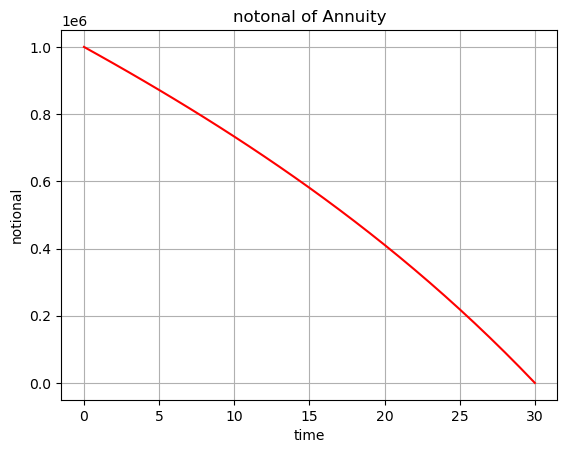

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def Annuity(rate,notonal,periods,CPR):
    # it returns a matrix M such that
    # M=  [0,       1,            2,           3,                4              5]
    # M = [t  notional(t)  prepayment(t)  notional_quote(t)  interest_(t)  installment(t)]
    # WARNING! here "rate" and "periods" are quite general, the choice of getting year/month/day.. steps, depends on the rate
    # that the function receives. So, it is necessary to pass the correct rate to the function
    M=np.zeros((periods+1,6))
    M[:,0]=np.arange(periods+1)# time
    M[0,1]=notonal
    for t in range(1,periods):
        remaing_period=periods-(t-1)
        # installmet C(t_i)
        M[:,5]=rate*M[t-1,1]/(1-1/(1+rate)**remaing_period)
        # intrest payemnt I(t_i)=K*N(t_{i})
        M[:,4]=rate*M[t-1,1]
        # notoanl payment Q(t_i)=C(t_i)-I(t-i)
        M[t,3]=M[t,5]-M[t,4]
        
        # prepament= P(t_i)=lambda*(N(t_i)-Q_(ti))
        M[t,2]=CPR*(M[t-1,1]-M[t,3])
        # notional, N(t_{i+1}) = N(t_{i}) - lambda * (Q(t_{i} + P(t_i)))
        M[t,1]=M[t-1,1]-M[t,3]-M[t,2]
        
        
        
        
    return M

def main():
    notonal=1000000
    r=0.05
    T_end=30
    Lambda=0.01
    M=Annuity(r, notonal, T_end, Lambda)
    for i in range(0,T_end+1):
        print("Ti={0}, Notional={1:.0f}, Prepayment={2:.0f}, Notional Repayment={3:.0f}, Interest Rate={4:.0f}, Installment={5:.0f} ".format(M[i,0],M[i,1],M[i,2],M[i,3],M[i,4],M[i,5]))
    plt.figure(1)
    plt.title("notonal of Annuity")
    plt.plot(M[:,0],M[:,1],'-r')
    plt.grid()
    plt.xlabel('time')
    plt.ylabel('notional')
    
    
main()
    
    

    